In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

In [5]:
xls = pd.ExcelFile('data.xlsx')
df_tr_interest = pd.read_excel(xls, 'tr_interest')
df_tr_yield = pd.read_excel(xls, 'tr_yield')

In [6]:
# df_tr_interest['Dates']

df_tr_interest['Dates'] = pd.to_datetime(df_tr_interest['Dates'])
df_tr_yield['Dates'] = pd.to_datetime(df_tr_yield['Dates'])
df_tr_yield['Yield'] = pd.to_numeric(df_tr_yield['Yield'])
df_tr_yield['Yield'] = df_tr_yield['Yield']/1000

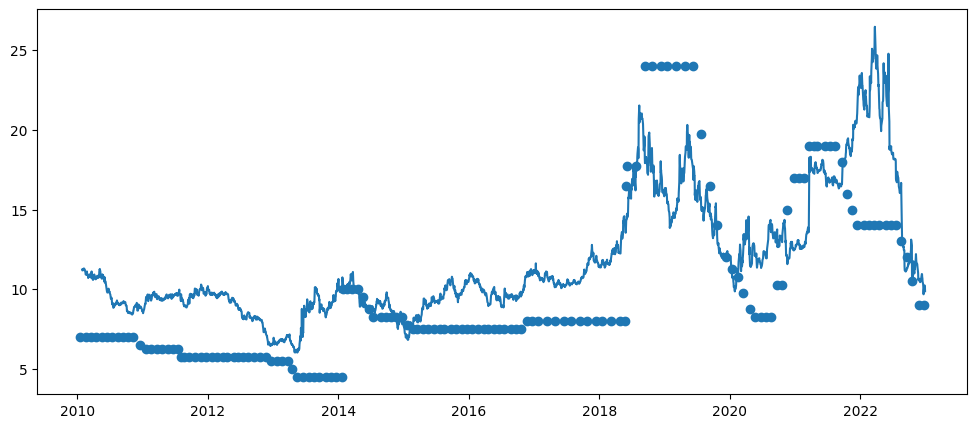

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(df_tr_yield.Dates, df_tr_yield.Yield)
ax.scatter(df_tr_interest.Dates, df_tr_interest['Interest Rate'])
plt.show()

In [12]:
df_decision = pd.DataFrame(columns=['date', 'mean_pre', 'interest_rate', 'mean_post'])
dates, mean_pres, interest_rates, mean_posts = [], [], [], []
day_range = 10
for decision_date in df_tr_interest.Dates:
    lo_range = decision_date - timedelta(days=day_range)
    hi_range = decision_date + timedelta(days=day_range)
    pre_idx = np.logical_and((lo_range<=df_tr_yield.Dates).values, (df_tr_yield.Dates<=decision_date).values)
    post_idx = np.logical_and((decision_date<=df_tr_yield.Dates).values, (df_tr_yield.Dates<=hi_range).values)

    mean_pre = df_tr_yield.loc[pre_idx, 'Yield'].mean()
    mean_post = df_tr_yield.loc[post_idx, 'Yield'].mean()
    interest_rate = df_tr_interest.loc[df_tr_interest.Dates==decision_date, 'Interest Rate'].values[0]

    dates.append(decision_date)
    mean_pres.append(mean_pre)
    mean_posts.append(mean_post)
    interest_rates.append(interest_rate)
df_decision.date = dates
df_decision.mean_pre = mean_pres
df_decision.interest_rate = interest_rates
df_decision.mean_post = mean_posts

In [13]:
uncredible = df_decision.loc[df_decision.mean_post > df_decision.mean_pre, ['date', 'interest_rate']]
credible = df_decision.loc[df_decision.mean_post <= df_decision.mean_pre, ['date', 'interest_rate']]

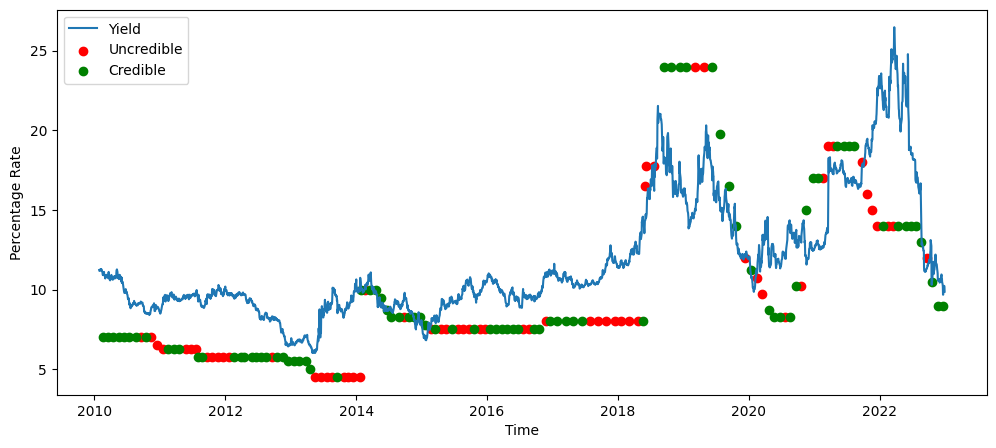

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(df_tr_yield.Dates, df_tr_yield.Yield, label='Yield')
ax.scatter(uncredible.date, uncredible.interest_rate, c='r', label='Uncredible')
ax.scatter(credible.date, credible.interest_rate, c='g', label='Credible')
ax.legend()
ax.set_ylabel('Percentage Rate')
ax.set_xlabel('Time')
plt.show()

In [15]:
uncredible.shape

(61, 2)

In [16]:
credible.shape

(86, 2)

In [17]:
credible.shape[0] / uncredible.shape[0]

1.4098360655737705